<a href="https://colab.research.google.com/github/ddarshana04/Machine-Learning/blob/main/CNN/fish_species_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshanadurgamahanty","key":"48fa55beee356eef55b35b8b6aeba562"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [00:26<00:00, 126MB/s]
100% 3.24G/3.24G [00:26<00:00, 132MB/s]


In [ ]:
! unzip a-large-scale-fish-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00448.png  
  inflating: Fish_Dataset/Fish_Dataset/

In [ ]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
path = "Fish_Dataset/Fish_Dataset"
!mkdir fish_dataset
fishes = []
for name in os.listdir(path):
    if os.path.isdir(os.path.join(path, name)):
        fishes.append(name)
for fish in fishes:
    fish_image_folder = os.path.join(path, fish, fish)
    shutil.copytree(fish_image_folder, os.path.join("./fish_dataset", fish))

In [ ]:
print(os.listdir("./fish_dataset"))
print(os.listdir("./fish_dataset/Gilt-Head Bream")[:3])

['Red Sea Bream', 'Shrimp', 'Hourse Mackerel', 'Striped Red Mullet', 'Red Mullet', 'Black Sea Sprat', 'Sea Bass', 'Trout', 'Gilt-Head Bream']
['00287.png', '00457.png', '00640.png']


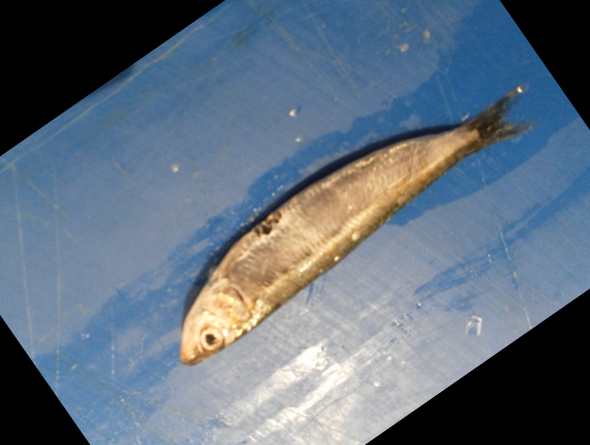

In [ ]:
from PIL import Image as im
from PIL import ImageOps
img = im.open("/content/fish_dataset/Black Sea Sprat/00001.png")
# ImageOps.grayscale(img)
img

In [ ]:
# Creating the training and validation set
img_size = (224, 224)
batch_size = 32
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "./fish_dataset/",
    labels="inferred",
    label_mode="categorical",  
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,  
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "./fish_dataset/",
    labels="inferred",
    label_mode="categorical",  
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,  
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="validation",
)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.
Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [ ]:
model = keras.Sequential([
    layers.Input((224, 224, 3)),
    
    layers.Conv2D(16, 3, activation="relu"),
    layers.BatchNormalization(), # Regularization
    layers.MaxPooling2D(), 
    
    layers.Conv2D(32, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2), # Regularization
    layers.Dense(9, activation="softmax"),
])

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"],
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 32)     128       
 hNormalization)                                                 
                                                        

In [ ]:
model.fit(ds_train, batch_size=64, epochs=5, verbose=2, validation_data=ds_validation)

Epoch 1/5
225/225 - 504s - loss: 0.7521 - accuracy: 0.7678 - val_loss: 0.4486 - val_accuracy: 0.9211 - 504s/epoch - 2s/step
Epoch 2/5
225/225 - 504s - loss: 0.1399 - accuracy: 0.9819 - val_loss: 0.1320 - val_accuracy: 0.9806 - 504s/epoch - 2s/step
Epoch 3/5
225/225 - 494s - loss: 0.0606 - accuracy: 0.9972 - val_loss: 0.0566 - val_accuracy: 0.9928 - 494s/epoch - 2s/step
Epoch 4/5
225/225 - 501s - loss: 0.0310 - accuracy: 0.9994 - val_loss: 0.0414 - val_accuracy: 0.9933 - 501s/epoch - 2s/step
Epoch 5/5
225/225 - 510s - loss: 0.0226 - accuracy: 0.9996 - val_loss: 0.0279 - val_accuracy: 0.9972 - 510s/epoch - 2s/step


In [ ]:
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    "./fish_dataset/",
    labels="inferred",
    label_mode="categorical",  
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,  
    shuffle=True,
    seed=1,
    validation_split=0.6,
    subset="validation",
)

Found 9000 files belonging to 9 classes.
Using 5400 files for validation.


In [ ]:
type(model)

keras.engine.sequential.Sequential

In [ ]:
model.evaluate(ds_test)

169/169 [==============================] - 120s 698ms/step - loss: 0.0138 - accuracy: 0.9989


[0.01381651870906353, 0.9988889098167419]

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('/content/test/rohu.jpg')
Fish = {0:"Black Sea Sprat",
        1:"Gilt-Head Bream",
        2:"Hourse Mackerel",
        3:"Red Mullet",
        4:"Red Sea Bream",
        5:"Sea Bass",
        6:"Shrimp",
        7:"Striped Red Mullet",
        8:"Trout"}
# Fish[np.argmax(model.predict(image))]
model.predict(image)


# plt.imshow(image[0], interpolation='nearest')
# plt.show()

# ! tree test

array([[0.00152279, 0.06679081, 0.00346093, 0.23520052, 0.5556042 ,
        0.00535924, 0.10778648, 0.00400166, 0.02027342]], dtype=float32)

In [ ]:
model.save("model")